In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

N=3600#total number of seconds in one hour
N=N
readings=np.ones(int(N/60))*90
dt=1/N
noise=np.random.normal(0,7.35,N)


readings=readings+np.random.normal(0,8,len(readings))
u=np.zeros(N)
pred_u=np.ones(N)*90
pred_x=np.zeros(N)
x=np.zeros(N)

for i in range(0,N):
    u[i]=readings[int(i/len(readings))]
    


Creating noisyand desired velocity position estimates

Text(0, 0.5, 'kilometers/hour')

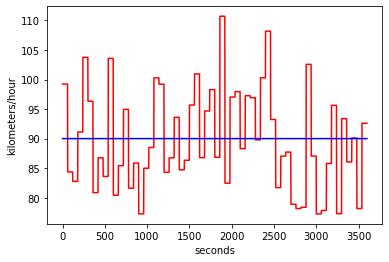

In [2]:
plt.plot(u,'r',label="Measurement Values")
plt.plot(pred_u,'b',label="Desired velocity")

plt.xlabel("seconds")
plt.ylabel("kilometers/hour")

Text(0, 0.5, 'Km/hr')

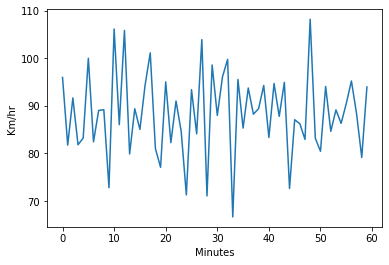

In [7]:
plt.plot(readings)
plt.xlabel("Minutes")
plt.ylabel("Km/hr")

60 data velocity data points with noisy

Text(0, 0.5, 'kilometers')

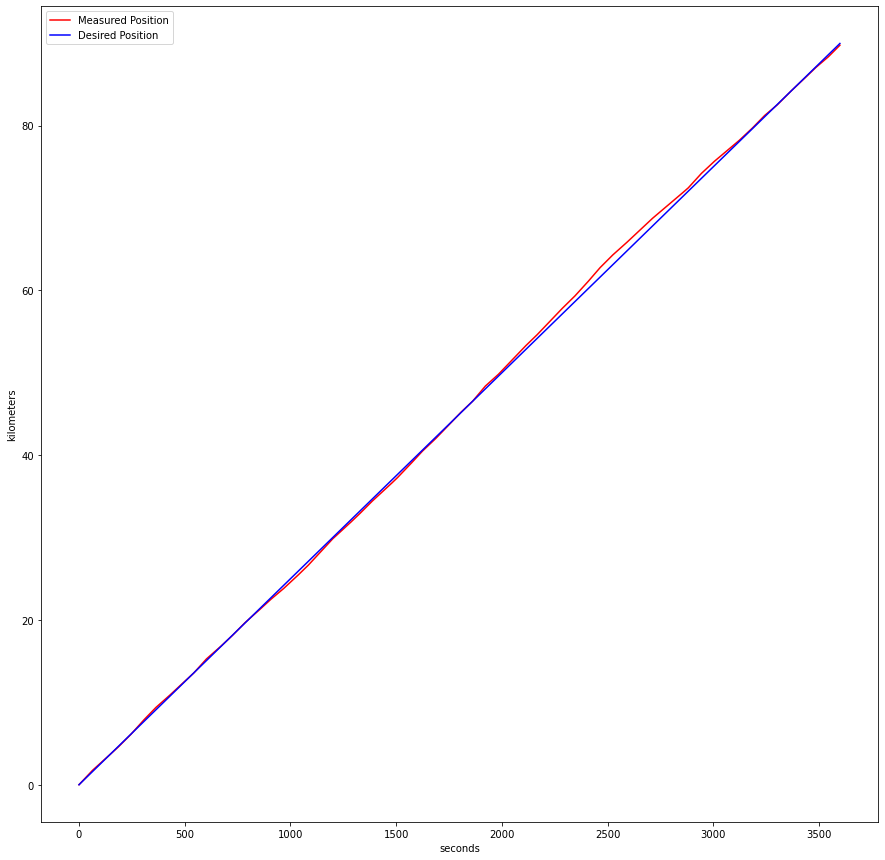

In [3]:
for i in range(1,N):
    x[i]=x[i-1]+u[i-1]*dt
    pred_x[i]=pred_x[i-1]+pred_u[i-1]*dt

plt.figure(figsize=(15,15))
plt.plot(x[:N],'r',label="Measured Position")
plt.plot(pred_x[:N],'b',label="Desired Position")
plt.legend()
plt.xlabel("seconds")
plt.ylabel("kilometers")


corresponding desired and measured estimates

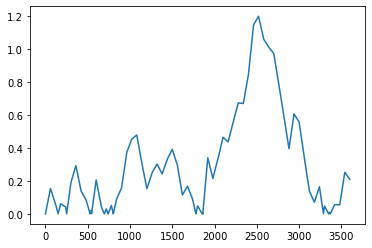

In [4]:
plt.plot(np.sqrt((pred_x-x)**2))

magnitude of error in position measurements

In [6]:
def kalm(theta_ukf,omega_ukf,observed,X_pred,dt,P=np.array([[0.01,0],[0,1]])):
    F=np.array([[1,dt],[0,1]]) #state transition matrix#
    X_prev=np.array([theta_ukf,omega_ukf])# previous output value
    G=np.array([0.5*dt**2,dt]) # control variables
    acc=(observed[1]-omega_ukf)/dt # 
    print(acc*dt)
    X_pred=X_pred #Desired value
    Qk=np.array([[0.25*dt**4,0.5*dt**3],[0.5*dt**3,dt**2]])*0.3  #covariance of process noise  
    H=np.array([1,0])#observation model
    Pk=np.matmul(np.matmul(F,P),F.T)+(Qk*acc)#predicted estimate covariance
    inv=np.matmul(np.matmul(H,Pk),H.T) +0.05
    K=np.matmul(Pk,H.T)/inv
    X_pred+=K*(observed-np.matmul(H,X_pred))#updation step
    var=1-np.matmul(K,H)
    Pk=var*Pk
    return X_pred, Pk

Function to define kalman filter

In [7]:
x_Kf=list([0])# position output values of kalman filter 
u_Kf=list([90])# velocity output values of kalman filter 

v2=np.array([[0.01,0],[0,1]])
out_x=list()
out_u=list()
for i in range(0,N):
    v1,v2=kalm(x_Kf[-1],u_Kf[-1],[x[i],u[i]],[pred_x[i],pred_u[i]],dt)#,v2)
    x_Kf.append(v1[0])
    u_Kf.append(v1[1])
    

9.225800942135022
8.766246236152739
8.766370815238375
8.766486595722341
8.7666023763758
8.766718157030382
8.766833937686073
8.766949718342872
8.767065499000807
8.767181279659837
8.767297060320004
8.76741284098128
8.767528621643663
8.76764440230717
8.767760182971799
8.767875963637536
8.767991744304396
8.768107524972365
8.768223305641456
8.76833908631167
8.768454866982992
8.768570647655437
8.76868642832899
8.768802209003667
8.768917989679451
8.769033770356359
8.769149551034388
8.769265331713527
8.769381112393788
8.769496893075157
8.76961267375765
8.76972845444125
8.769844235125987
8.769960015811819
8.770075796498773
8.77019157718685
8.77030735787605
8.770423138566358
8.770538919257774
8.770654699950313
8.770770480643975
8.770886261338745
8.771002042034638
8.771117822731654
8.771233603429778
8.77134938412901
8.77146516482938
8.771580945530843
8.771696726233444
8.771812506937152
8.77192828764197
8.77204406834791
8.772159849054972
8.772275629763143
8.772391410472437
8.77250719118284
8.77262

-9.880237091536983
-9.880121400029239
-9.880005708520372
-9.879890017010396
-9.8797743254993
-9.879658633987077
-9.87954294247376
-9.87942725095931
-9.879311559443751
-9.87919586792708
-9.879080176409289
-9.878964484890375
-9.878848793370352
-9.878733101849221
-9.878617410326967
-9.878501718803593
-9.878386027279106
-4.881457288398892
-4.904531865217862
-4.904415841532668
-4.904300126134245
-4.904184410730608
-4.904068695325847
-4.903952979919978
-4.903837264512987
-4.903721549104887
-4.903605833695663
-4.903490118285333
-4.9033744028738795
-4.903258687461303
-4.903142972047618
-4.903027256632825
-4.902911541216909
-4.9027958257998705
-4.9026801103817235
-4.902564394962468
-4.902448679542075
-4.902332964120589
-4.90221724869798
-4.902101533274248
-4.901985817849393
-4.901870102423444
-4.901754386996359
-4.901638671568165
-4.901522956138862
-4.901407240708437
-4.901291525276889
-4.901175809844233
-4.901060094410468
-4.900944378975581
-4.900828663539571
-4.900712948102452
-4.900597232664

9.957143218754851
8.874393925435868
8.879539819860895
8.87965553308743
8.879771314923957
8.879887096760655
8.880002878598475
8.880118660437418
8.88023444227747
8.880350224118644
8.880466005960926
8.880581787804331
8.880697569648845
8.880813351494481
8.88092913334124
8.881044915189108
8.881160697038098
8.881276478888196
8.881392260739418
8.881508042591761
8.881623824445214
8.881739606299774
8.881855388155472
8.881971170012264
8.882086951870193
8.88220273372923
8.882318515589375
8.882434297450658
8.882550079313035
8.882665861176548
8.882781643041156
8.8828974249069
8.883013206773754
8.88312898864173
8.883244770510814
8.88336055238102
8.883476334252336
8.883592116124774
8.883707897998335
8.883823679873004
8.883939461748781
8.884055243625696
8.884171025503719
8.88428680738285
8.884402589263104
8.88451837114448
8.884634153026965
8.884749934910573
8.88486571679529
8.884981498681128
8.88509728056809
8.88521306245616
8.885328844345338
8.885444626235653
8.885560408127077
8.885676190019609
8.885

10.665058539167717
10.66517432982964
10.665290120492685
10.665405911156839
10.665521701822115
10.665637492488502
10.665753283156008
10.665869073824638
10.665984864494376
10.666100655165238
10.666216445837208
10.6663322365103
10.666448027184499
10.666563817859824
10.66667960853627
10.666795399213825
10.6669111898925
10.667026980572288
10.667142771253197
10.667258561935228
10.667374352618367
-3.50485388247823
-3.4389697990561956
-3.4388546631652446
-3.438738940184507
-3.4386232172078905
-3.4385074942301657
-3.438391771251318
-3.4382760482713484
-3.4381603252902693
-3.438044602308068
-3.437928879324758
-3.437813156340326
-3.437697433354785
-3.4375817103681214
-3.4374659873803495
-3.4373502643914553
-3.437234541401452
-3.437118818410326
-3.4370030954180777
-3.436887372424721
-3.4367716494302414
-3.4366559264346535
-3.436540203437943
-3.436424480440124
-3.436308757441182
-3.436193034441132
-3.436077311439959
-3.435961588437678
-3.435845865434274
-3.4357301424297475
-3.4356144194241125
-3.43

7.740239944021056
7.7403557209197515
7.740471497819556
7.740587274720482
7.740703051622519
7.7408188285256765
7.740934605429942
7.741050382335331
7.741166159241843
-1.9101175515395283
-1.8652383625823887
-1.86512294091888
-1.8650072101181223
-1.8648914793183735
-1.8647757485175163
-1.8646600177155364
-1.864544286912434
-1.8644285561082228
-1.8643128253029035
-1.8641970944964614
-1.8640813636888964
-1.8639656328802234
-1.8638499020704276
-1.863734171259523
-1.863618440447496
-1.8635027096343606
-1.8633869788201027
-1.8632712480047362
-1.8631555171882468
-1.863039786370635
-1.8629240555519146
-1.862808324732072
-1.8626925939111203
-1.8625768630890607
-1.8624611322658637
-1.8623454014415728
-1.862229670616145
-1.8621139397896087
-1.861998208961964
-1.8618824781331968
-1.8617667473033066
-1.8616510164723081
-1.8615352856402014
-1.8614195548069574
-1.8613038239726194
-1.8611880931371447
-1.8610723623005756
-1.8609566314628696
-1.860840900624055
-1.860725169784132
-1.8606094389430865
-1.8604

-8.381112490296516
-8.380996790528414
-8.380881090759203
-8.380765390988884
-8.380649691217442
-8.380533991444878
-8.380418291671205
-8.38030259189641
-8.380186892120506
-8.380071192343493
-8.379955492565358
-8.3798397927861
-8.379724093005734
-8.379608393224245
-8.379492693441648
-8.379376993657928
-8.379261293873085
-8.379145594087149
-8.379029894300075
-8.378914194511893
-8.378798494722602
-8.378682794932189
-8.378567095140667
-8.378451395348009
-8.378335695554256
-8.37821999575938
-8.378104295963382
-8.377988596166276
-8.37787289636806
-8.377757196568709
-8.377641496768263
-8.37752579696668
-8.377410097164002
-8.377294397360188
-8.37717869755528
-8.377062997749235
-8.376947297942081
-8.376831598133819
-3.0421098437339396
-3.0667059346968557
-3.0665901019620496
-3.0664743766618727
-3.066358651360119
-3.0662429260572566
-3.0661272007532574
-3.066011475448164
-3.0658957501419337
-3.065780024834595
-3.065664299526148
-3.065548574216578
-3.0654328489058855
-3.0653171235940846
-3.0652013

-3.0124211602251734
-3.0123054344385594
-3.012189708650837
-3.012073982861992
-3.0119582570720382
-3.011842531280962
-3.0117268054887774
-3.01161107969547
-3.01149535390104
-3.0113796281055016
-3.0112639023088548
-3.011148176511071
-3.011032450712193
-3.010916724912178
-3.010800999111069
-12.80186511642016
-12.75642134175645
-12.75630568244162
-12.756190003417018
-12.756074324391307
-12.755958645364473
-12.755842966336528
-12.755727287307465
-12.755611608277292
-12.755495929245996
-12.755380250213591
-12.755264571180062
-12.755148892145414
-12.75503321310967
-12.754917534072788
-12.754801855034799
-12.754686175995701
-12.754570496955482
-12.75445481791415
-12.7543391388717
-12.754223459828125
-12.754107780783444
-12.753992101737651
-12.753876422690738
-12.753760743642717
-12.75364506459357
-12.753529385543304
-12.753413706491926
-12.753298027439442
-12.75318234838582
-12.753066669331105
-12.752950990275266
-12.752835311218305
-12.752719632160236
-12.752603953101058
-12.752488274040743


Text(0, 0.5, 'velocity')

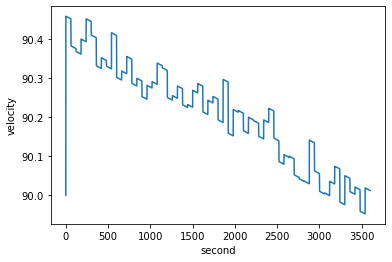

In [9]:
plt.plot(u_Kf)
plt.xlabel("second")
plt.ylabel("velocity")


Velocity output

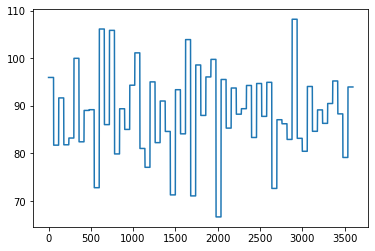

In [17]:
plt.plot(u)

Noisy velocity input

Text(0, 0.5, 'kilometers/hour')

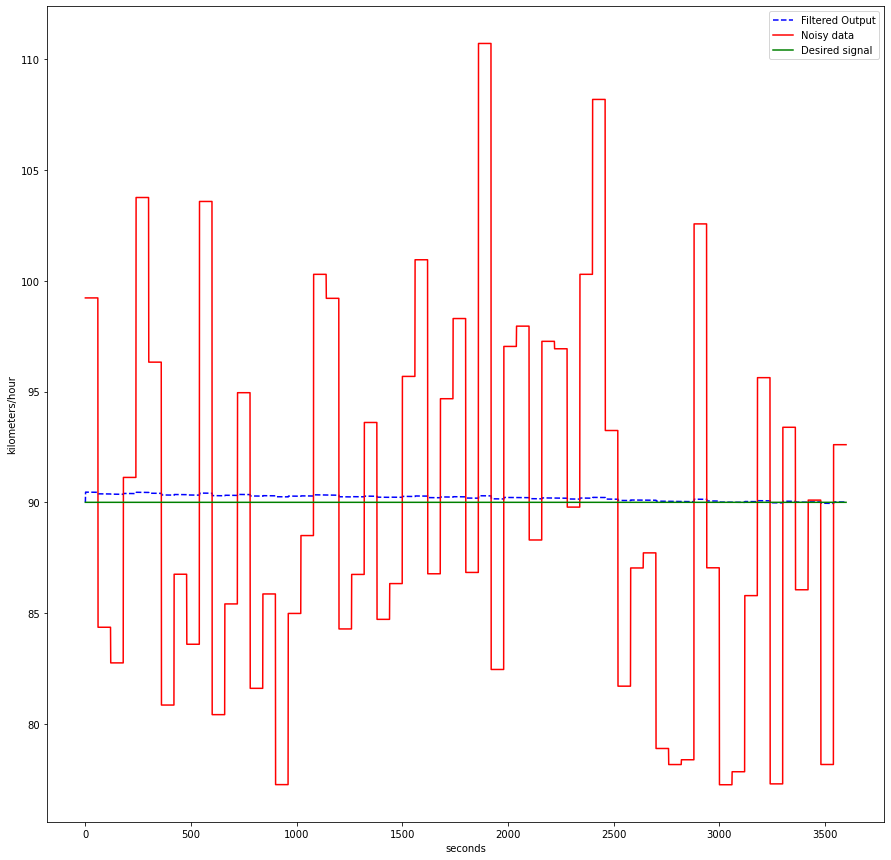

In [10]:
plt.figure(figsize=(15,15))
plt.plot(u_Kf,'--b',label="Filtered Output")
plt.plot(u,'r',label="Noisy data")
plt.plot(pred_u,'g',label="Desired signal")
plt.legend()
plt.xlabel("seconds")
plt.ylabel("kilometers/hour")

Text(0, 0.5, 'kilometers')

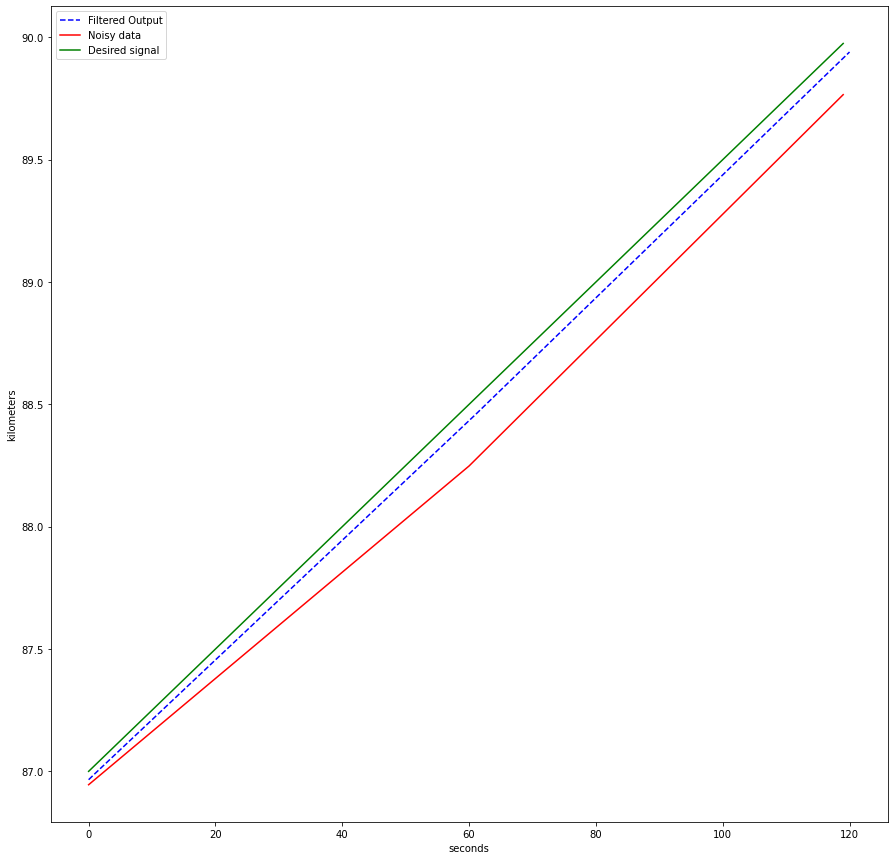

In [12]:
plt.figure(figsize=(15,15))
plt.plot(x_Kf[N-120:],'--b',label="Filtered Output")
plt.plot(x[N-120:],'r',label="Noisy data")
plt.plot(pred_x[N-120:],'g',label="Desired signal")
plt.legend()
plt.xlabel("seconds")
plt.ylabel("kilometers")

Text(0, 0.5, 'kilometers')

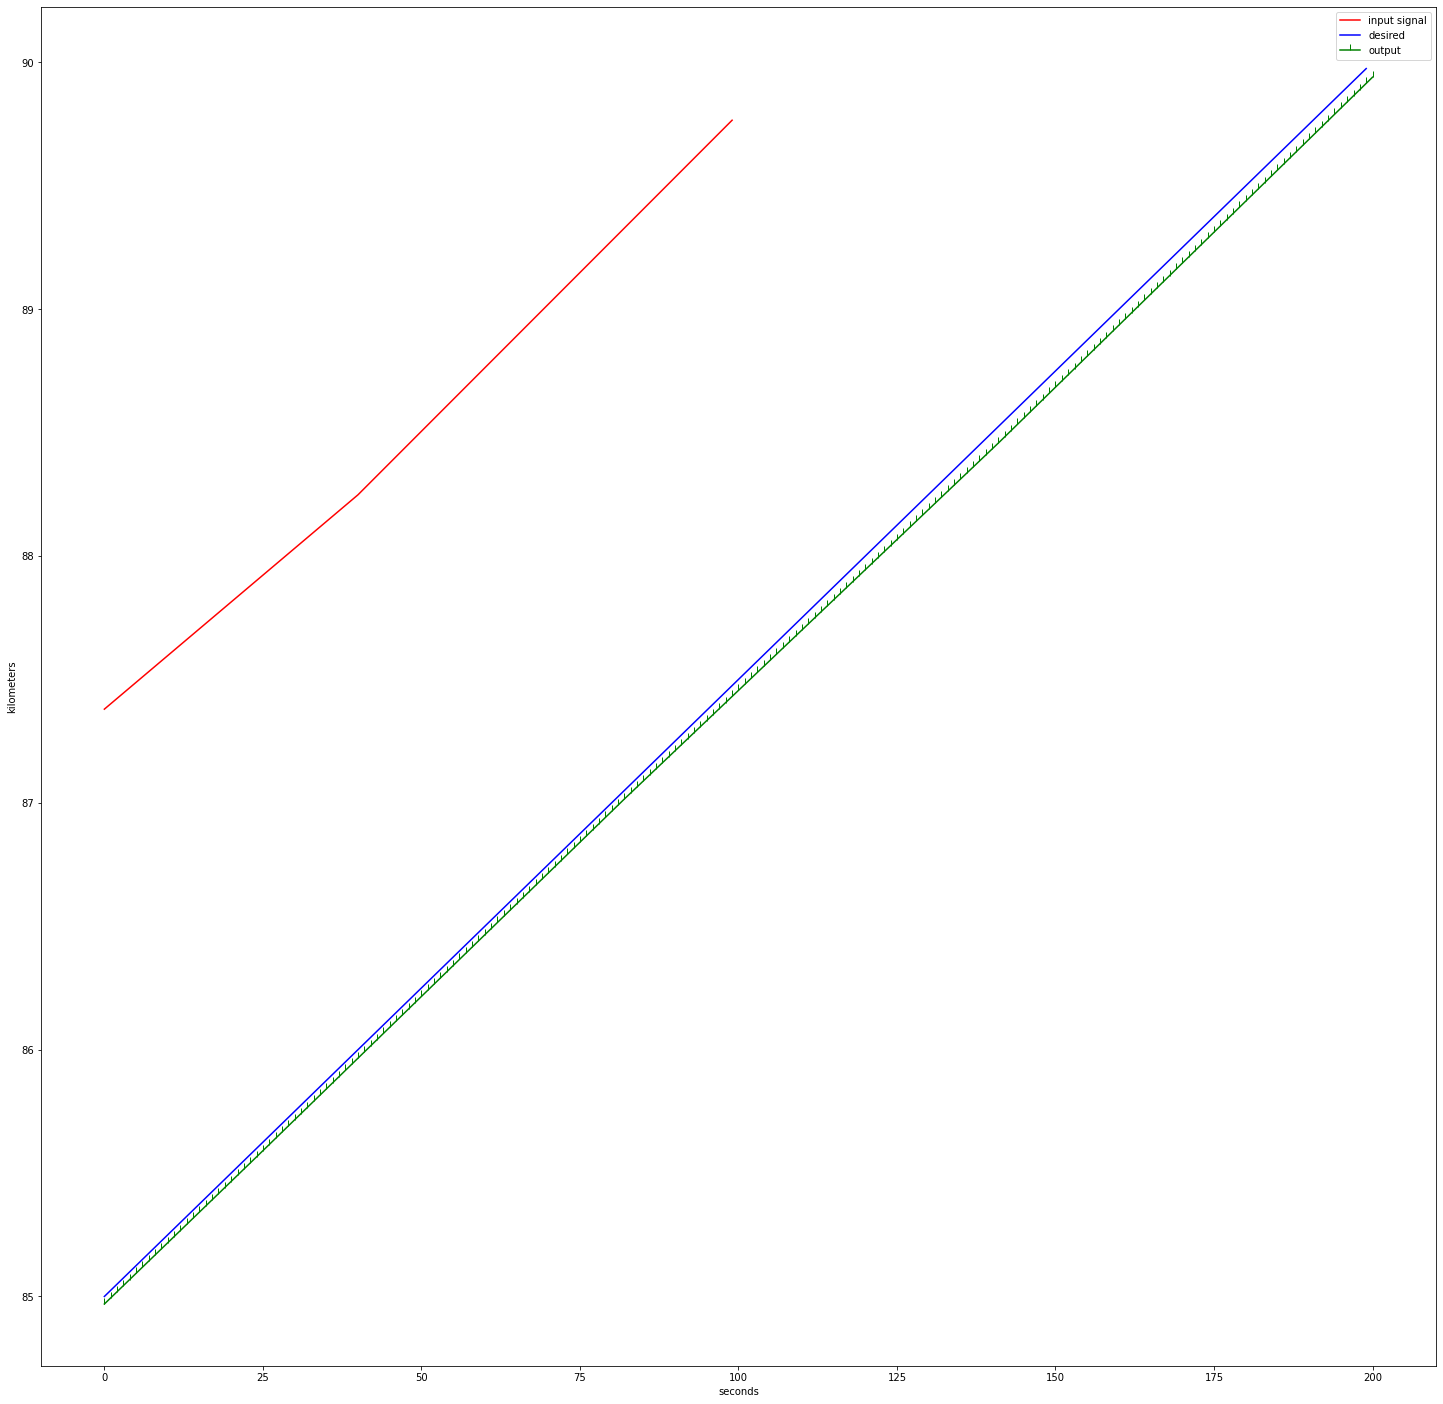

In [13]:
plt.figure(figsize=(25,25))
plt.plot(x[N-100:],'r',label='input signal')
plt.plot(pred_x[N-200:],'b',label='desired')
plt.plot(x_Kf[N-200:],'g',label='output',marker=2)

plt.xlabel("seconds")
plt.legend()
plt.ylabel("kilometers")


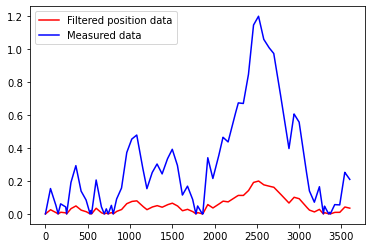

In [14]:
plt.plot(np.sqrt((x_Kf[1:]-pred_x)**2),'r',label="Filtered position data")
plt.plot(np.sqrt((x-pred_x)**2),'b',label="Measured data")
plt.legend()

Position error magnitude

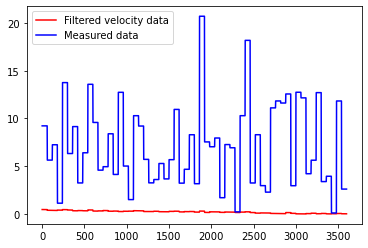

In [15]:
plt.plot(np.sqrt((u_Kf[1:]-pred_u)**2),'r',label="Filtered velocity data")
plt.plot(np.sqrt((u-pred_u)**2),'b',label="Measured data")
plt.legend()

Velocity error magnitude 

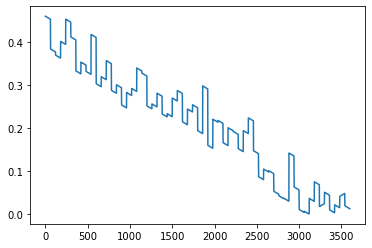

In [16]:
plt.plot(np.sqrt((u_Kf[1:]-pred_u)**2))

Q2 Creating noisy GPS data

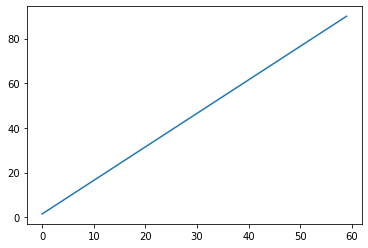

In [33]:
x_gps=np.zeros(int(N/60))
v_gps=np.zeros((int(N/60)))




for i in range(0,len(x_gps)):
    x_gps[i]=x_gps[i-1]+(90*60)*dt
    v_gps[i]=(x_gps[i]-x_gps[i-1])/(60*dt)

plt.plot(x_gps)

Desired GPS readings

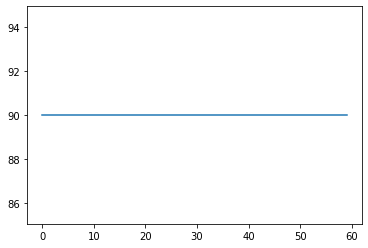

In [34]:
plt.plot(v_gps)

Desired velocity readings

In [103]:
desired_gps_x=np.linspace(x_gps[0],x_gps[-1],N)
desired_gps_u=np.linspace(v_gps[0],v_gps[-1],N)

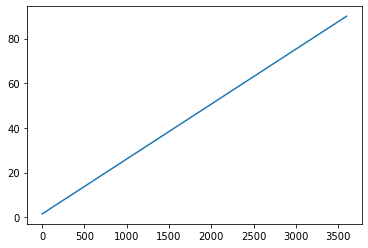

In [104]:
plt.plot(desired_gps_x)

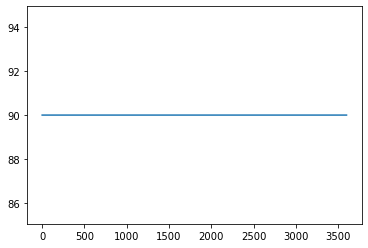

In [105]:
plt.plot(desired_gps_u)

In [38]:
x_gps_in=x_gps+np.random.normal(0,0.3,len(x_gps))

In [66]:
u_gps_in=list([90])
for i in range(1,len(x_gps_in)):
    u_gps_in.append((x_gps_in[i]-x_gps_in[i-1])/(60*dt))

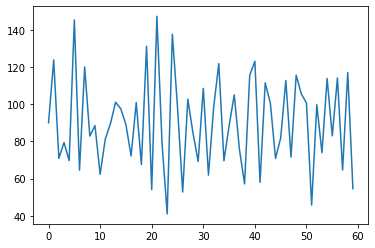

In [67]:
plt.plot(u_gps_in)

Noisy Velocity measurements from GPS data

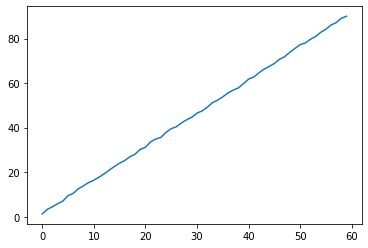

In [68]:
plt.plot(x_gps_in)

Noisy input positing data 

In [69]:
gps_x=list()
gps_u=list()
#gps_x.append(np.linspace(0,0,61)[0:60])
for i in range(0,len(x_gps_in)):
    gps_x.append((np.linspace(x_gps_in[i],x_gps_in[i],60)))
    gps_u.append((np.linspace(u_gps_in[i],u_gps_in[i],60)))
    

Propagating over 3600 seconds

In [106]:
len(gps_u)

3600

In [107]:
gps_x=np.array(gps_x).flatten()
gps_u=np.array(gps_u).flatten()


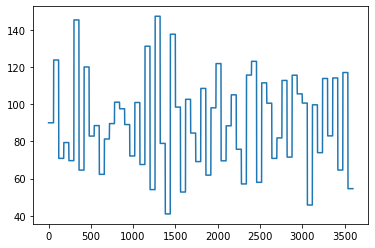

In [108]:
plt.plot(gps_u)

Text(0, 0.5, 'Kilometers')

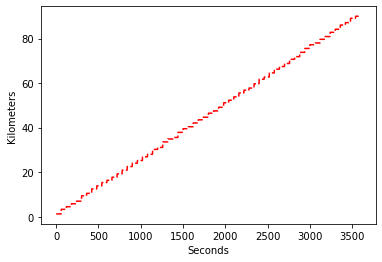

In [109]:
plt.plot(gps_x,'--r',label="Input Gps Data")
plt.xlabel("Seconds")
plt.ylabel("Kilometers")


In [112]:
x_Kf=list([0])
u_Kf=list([90])

v2=np.array([[0.01,0],[0,1]])
out_x=list()
out_u=list()
for i in range(0,N):
    v1,v2=kalm(x_Kf[-1],u_Kf[-1],[gps_x[i],gps_u[i]],[desired_gps_x[i],desired_gps_u[i]],dt)#,v2)
    x_Kf.append(v1[0])
    u_Kf.append(v1[1])

0.0
-0.4097216953167475
-0.40960085939845214
-0.4094870201985401
-0.40937318087813424
-0.40925934155664834
-0.4091455022340824
-0.40903166291043647
-0.4089178235857105
-0.4088039842599045
-0.4086901449330327
-0.40857630560506664
-0.40846246627602056
-0.40834862694589447
-0.40823478761468834
-0.4081209482824022
-0.408007108949036
-0.40789326961460404
-0.4077794302790778
-0.40766559094247157
-0.4075517516047853
-0.407437912266019
-0.4073240729261727
-0.40721023358526054
-0.40709639424325417
-0.40698255490016777
-0.40686871555600135
-0.4067548762107549
-0.40664103686444264
-0.40652719751703614
-0.4064133581685496
-0.4062995188189831
-0.4061856794683365
-0.4060718401166241
-0.4059580007638175
-0.40584416140993085
-0.4057303220549642
-0.4056164826989317
-0.40550264334180497
-0.4053888039835982
-0.40527496462431145
-0.40516112526395887
-0.40504728590251204
-0.4049334465399852
-0.4048196071763783
-0.40470576781170564
-0.4045919284459387
-0.4044780890790918
-0.4043642497111648
-0.4042504103421

-27.90401296150783
-27.9038992516594
-27.903785541809867
-27.903671831959272
-27.903558122107597
-27.903444412254842
-27.903330702401007
-27.903216992546092
-27.903103282690093
-27.902989572833036
-27.90287586297488
-27.902762153115646
-27.902648443255345
-27.902534733393964
-27.90242102353149
-27.902307313667947
-27.902193603803326
-27.902079893937625
-27.901966184070844
-27.901852474202997
-27.901738764334056
-27.901625054464034
-27.901511344592947
-27.901397634720766
-27.901283924847515
-27.90117021497319
-27.901056505097785
-27.900942795221297
-27.90082908534373
-27.900715375465083
-27.90060166558536
-8.907165855998954
-8.99511476518677
-8.994999886165132
-8.994886087035624
-8.994772287891792
-8.994658488746879
-8.994544689600886
-8.994430890453813
-8.99431709130566
-8.994203292156428
-8.994089493006129
-8.993975693854736
-8.993861894702263
-8.993748095548725
-8.993634296394092
-8.993520497238379
-8.9934066980816
-8.993292898923727
-8.993179099764788
-8.993065300604755
-8.992951501

-22.592631492751448
-22.59251775757285
-22.592404022393154
-22.592290287212393
-22.592176552030537
-22.592062816847616
-22.59194908166361
-22.59183534647853
-22.59172161129237
-22.59160787610513
-22.591494140916808
-22.591380405727406
-22.591266670536925
-22.591152935345377
-22.591039200152736
-22.590925464959014
-22.590811729764226
-22.590697994568345
-22.590584259371397
-22.59047052417337
-22.590356788974262
-22.590243053774074
-22.590129318572806
-22.59001558337046
-22.58990184816703
-22.589788112962523
-22.589674377756936
-22.589560642550268
-22.589446907342534
-22.589333172133706
-22.589219436923813
-22.58910570171284
-22.58899196650077
-22.588878231287637
-22.588764496073424
-22.58865076085813
-22.588537025641756
-22.588423290424302
-22.588309555205765
-22.588195819986158
-22.58808208476546
-22.5879683495437
-22.587854614320847
-22.587740879096927
40.94044889223892
40.64548347451185
40.64560329054211
40.6457173242009
40.64583135797406
40.645945391748306
40.64605942552362
40.64617

-37.23478680372172
-37.23467313740375
-37.2345594710847
-37.23444580476456
-37.23433213844335
-37.23421847212106
-37.2341048057977
-37.23399113947324
-37.23387747314773
-37.23376380682112
-37.233650140493445
-37.23353647416468
-37.23342280783484
-37.23330914150394
-37.23319547517194
-37.233081808838854
-37.23296814250472
-37.232854476169486
-37.23274080983318
-37.23262714349579
-37.232513477157326
-37.23239981081778
-37.232286144477165
-37.232172478135475
12.561298552310092
12.33065674268191
12.330773370716201
12.330887271033859
12.331001171384827
12.331115071736875
12.331228972090004
12.33134287244421
12.331456772799498
12.331570673155866
12.331684573513314
12.331798473871842
12.331912374231448
12.332026274592138
12.332140174953906
12.33225407531677
12.332367975680697
12.332481876045705
12.332595776411807
12.332709676778975
12.332823577147224
12.332937477516566
12.333051377886974
12.333165278258477
12.33327917863106
12.333393079004706
12.33350697937945
12.333620879755273
12.3337347801

-20.503659899343546
-20.50354615376493
-20.50343240818522
-20.503318662604443
-20.503204917022586
-20.50309117143965
-20.502977425855633
-20.502863680270536
-20.502749934684374
-20.502636189097117
-20.50252244350878
-20.50240869791938
-20.50229495232888
-1.7060247981532797
-1.7929835861106371
-1.7928691604346059
-1.7927553265109708
-1.7926414925822343
-1.7925276586524177
-1.792413824721521
-1.7922999907895587
-1.7921861568565023
-1.7920723229223654
-1.791958488987149
-1.791844655050852
-1.7917308211134755
-1.7916169871750327
-1.791503153235496
-1.791389319294879
-1.7912754853531823
-1.7911616514104198
-1.7910478174665627
-1.790933983521626
-1.7908201495756089
-1.7907063156285261
-1.7905924816803491
-1.790478647731092
-1.7903648137807695
-1.7902509798293522
-1.7901371458768554
-1.790023311923278
-1.789909477968635
-1.789795644012898
-1.7896818100560807
-1.789567976098198
-1.7894541421392205
-1.7893403081791635
-1.7892264742180402
-1.7891126402558228
-1.78899880629254
-1.7888849723281623

21.221782956279057
21.2218968990977
21.222010841917438
21.22212478473824
21.22223872756013
21.222352670383103
21.22246661320716
21.222580556032284
21.222694498858502
21.2228084416858
21.222922384514163
21.22303632734362
21.22315027017416
21.223264213005777
21.223378155838475
21.223492098672267
21.22360604150713
21.223719984343063
21.223833927180095
21.223947870018193
21.22406181285737
21.224175755697644
21.224289698538996
21.224403641381414
21.224517584224927
21.224631527069523
21.22474546991519
21.224859412761944
21.224973355609777
21.225087298458693
21.22520124130868
21.225315184159754
21.225429127011903
21.225543069865154
21.225657012719466
21.225770955574873
21.225884898431346
21.225998841288913
21.226112784147563
21.226226727007273
21.22634066986808
21.226454612729967
21.226568555592934
21.22668249845698
21.226796441322108
21.226910384188315
21.227024327055602
21.227138269923984
21.22725221279343
21.227366155663958
21.227480098535583
21.227594041408267
21.22770798428205
10.3060988

15.38497914546626
15.385093060967833
15.385206976470501
15.385320891974246
15.385434807479058
15.385548722984964
15.38566263849195
15.385776554000017
15.385890469509166
15.38600438501939
15.386118300530697
15.386232216043084
15.38634613155655
15.386460047071097
15.386573962586723
15.386687878103432
15.386801793621231
15.386915709140096
15.387029624660059
15.387143540181086
15.387257455703192
15.387371371226394
15.387485286750675
15.387599202276022
15.387713117802463
15.387827033329984
15.38794094885857
15.388054864388252
15.388168779919013
15.388282695450854
10.450336561118107
10.473350613527357
10.47346439400549
10.473578286335936
10.473692178666923
10.473806070998991
10.473919963332136
10.474033855666363
10.47414774800167
10.474261640338057
10.474375532675523
10.474489425014069
10.474603317353697
10.474717209694404
10.474831102036191
10.474944994379058
10.475058886723007
10.475172779068032
10.475286671414153
10.47540056376134
10.475514456109607
10.475628348458969
10.475742240809396
1

filetering algorithm

Text(0.5, 0, 'seconds')

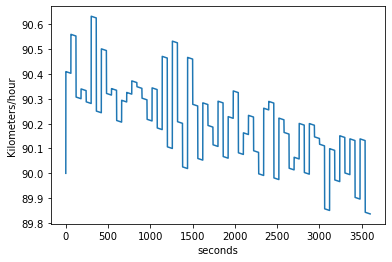

In [91]:
plt.plot(u_Kf)
plt.ylabel("Kilometers/hour")
plt.xlabel("seconds")

output velocity

Text(0.5, 0, 'seconds')

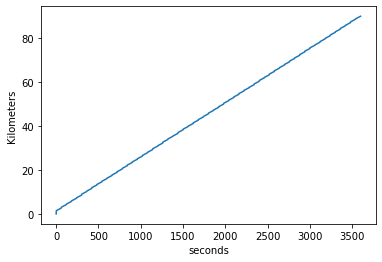

In [113]:
plt.plot(x_Kf)
plt.ylabel("Kilometers")
plt.xlabel("seconds")

output position

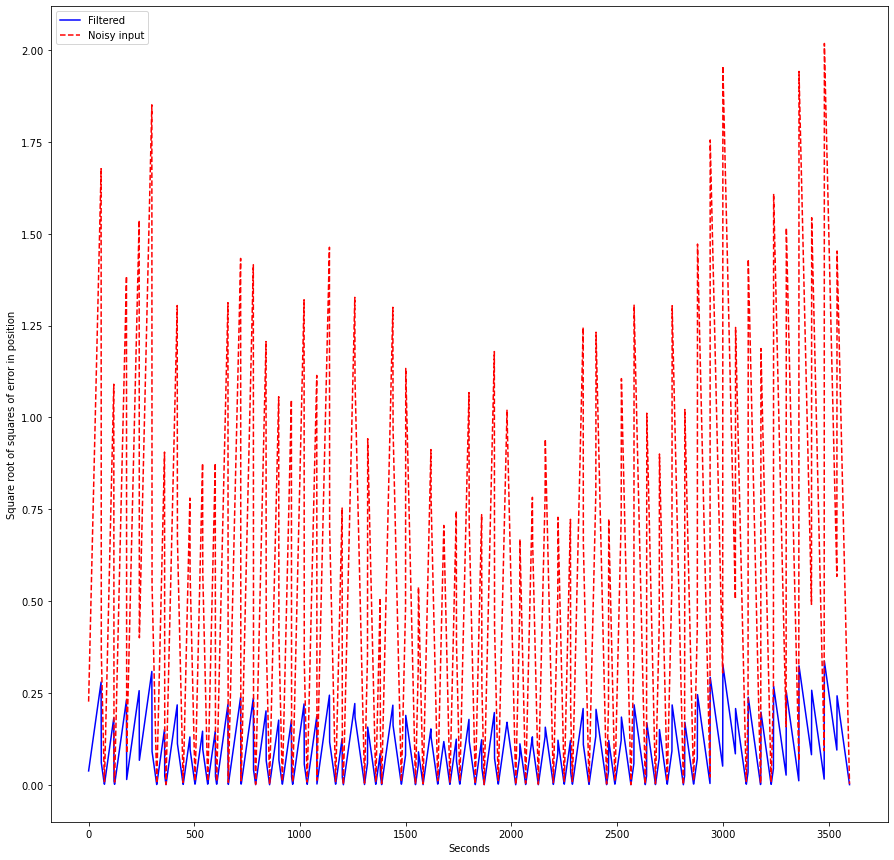

In [114]:
plt.figure(figsize=(15,15))
plt.plot(np.sqrt((desired_gps_x-x_Kf[1:])**2),'b',label='Filtered')
plt.plot(np.sqrt((desired_gps_x-gps_x)**2),'--r',label='Noisy input')
plt.xlabel("Seconds")
plt.ylabel("Square root of squares of error in position")

plt.legend()


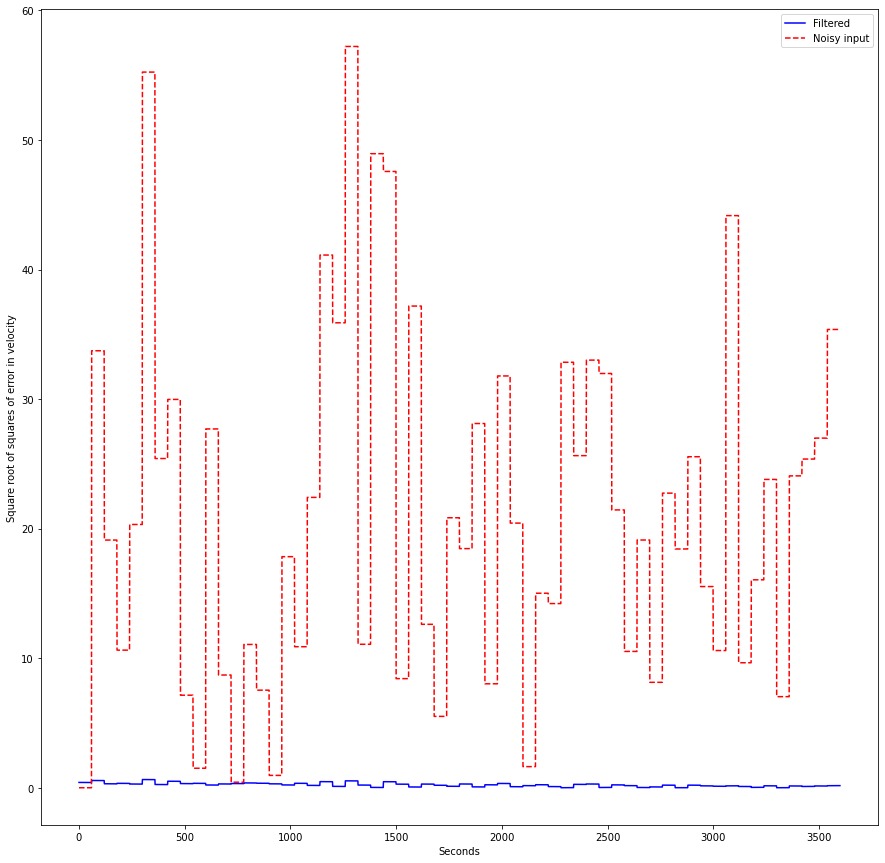

In [116]:
plt.figure(figsize=(15,15))
plt.plot(np.sqrt((desired_gps_u-u_Kf[1:])**2),'b',label='Filtered')
plt.plot(np.sqrt((desired_gps_u-gps_u)**2),'--r',label='Noisy input')
plt.xlabel("Seconds")
plt.ylabel("Square root of squares of error in velocity")
plt.legend()


Text(0, 0.5, 'kilometers')

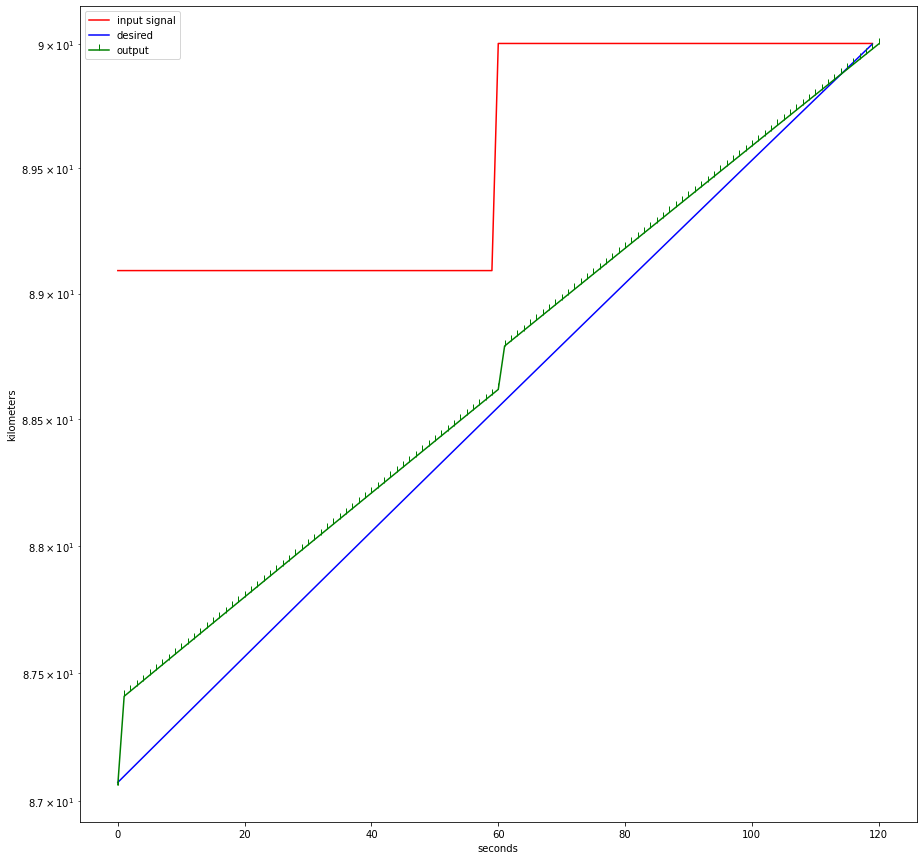

In [101]:
plt.figure(figsize=(15,15))
plt.plot(gps_x[N-120:],'r',label='input signal')
plt.plot(desired_gps_x[N-120:],'b',label='desired')
plt.plot(x_Kf[N-120:],'g',label='output',marker=2)
plt.yscale('log')
plt.xlabel("seconds")
plt.legend()
plt.ylabel("kilometers")

Output signal for the last two minutes

Text(0, 0.5, 'kilometers')

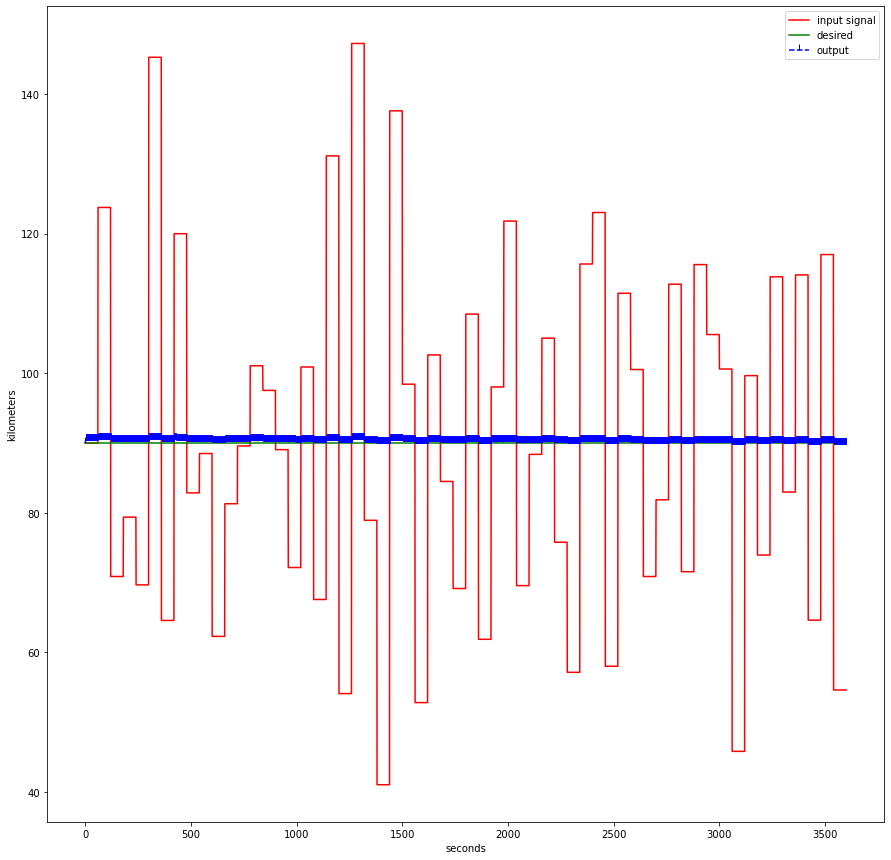

In [102]:
plt.figure(figsize=(15,15))
plt.plot(gps_u[:],'r',label='input signal')
plt.plot(desired_gps_u[:],'g',label='desired')
plt.plot(u_Kf[:],'--b',label='output',marker=2)

plt.xlabel("seconds")
plt.legend()
plt.ylabel("kilometers")